# Lab Two: Exploring Image Data

Team: Miro Ronac, Kirk Watson, Brandon Vincitore

## 1. Business Understanding 

This data can be useful in identifying pneumonia in pediatric patients and assisting doctors with making accurate observations from X-rays.

In the Guangzhou Women and Children’s Medical Center, "chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old. All chest X-ray imaging was performed as part of patients’ routine clinical care." To ensure quality of the dataset, the "images were graded by two expert physicians." This data was collected to allow engineers to train an AI system that can efficiently identify pneumonia in pediatric patients.

Ultimately, the ability to identify a patient with pneumonia with increased efficiency and accuracy is the intention of analyzing this dataset. With this capability, a pneumonia diagnosis can be reached at a faster rate compared to when a human makes the diagnosis. Hospitals and clinicians with a high influx of patients (such as the Guangzhou Women and Children’s Medical Center) can make accurate diagnoses while not spending as much time observing X-rays utilizing this classifier. This can allow physicians to spend an alloted amount of time to care for a greater number of patients. In addition, medical practitioners can use this available time to examine other aspects of the X-ray or case of the patient.

To evaluate the success of a machine learning algorithm for this dataset, the classifier would have to at least peform as well as a human. [As per research published with the Radiological Society of North America](https://pubs.rsna.org/doi/full/10.1148/radiol.2020200823), humans can have a 94% success rate when identifying pneumonia in patients. If this is an easy threshold for our classifier to overcome, we can compare ourselves to other competitors. [A classifier made by Rohit Kundu and his partners](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0256630) had a success rate of 98.81%.


Dataset Source: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

## 2. Data Preparation

In [1]:
import os

import numpy as np

from PIL import Image
from numpy import asarray
from os import listdir
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
normal_dir = "chest_xray/train/NORMAL/"
pneumonia_dir = "chest_xray/test/PNEUMONIA/"

data = []
file_names = []
h, w = 100, 100

#load normal images
for images in os.listdir(normal_dir):
    #create image, resize to 100x100
    image = Image.open(normal_dir + images)
    image = image.resize((h,w))
    #convert image to numpy array and flatten
    data_i = asarray(image)
    feature_i = data_i.flatten()
    #add image to list of images
    data.append(feature_i)
    #extract file name
    _, fname = os.path.split(images)
    file_names.append(fname)
    
#load pneumonia images images
for images in os.listdir(pneumonia_dir):
    #create image, resize to 100x100
    image = Image.open(pneumonia_dir + images)
    image = image.resize((h,w))
    #convert image to numpy array and flatten
    data_i = asarray(image)
    feature_i = data_i.flatten()
    #add image to list of images
    data.append(feature_i)
    #extract file name
    _, fname = os.path.split(images)
    file_names.append(fname)
    
data = np.asarray(data)
print('Total images:', data.shape[0])
print('Image features:', data.shape[1])

Total images: 1731
Image features: 10000


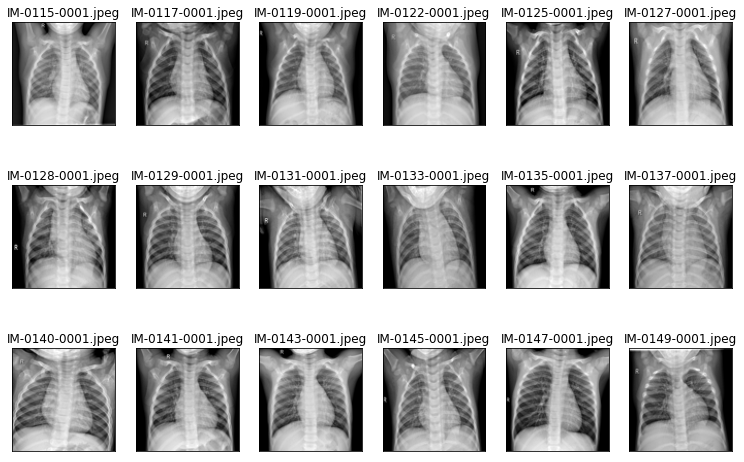

In [3]:
# a helper plotting function from class
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(data, file_names, h, w) # defaults to showing a 3 by 6 subset of the faces

## 3. Data Reduction

In [4]:
# helper functions from class
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

### 3.1 Linear Dimensionality Reduction Using PCA

Extracting the top 400 eigenlungs from 1731 lungs
CPU times: total: 12.3 s
Wall time: 1.22 s


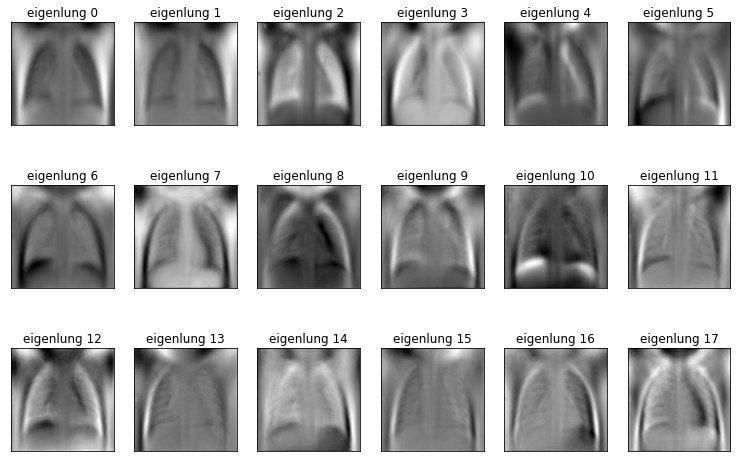

In [5]:
from sklearn.decomposition import PCA

n_components=400
print ("Extracting the top %d eigenlungs from %d lungs" % (n_components, data.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(data.copy())

eigenlungs = pca.components_
eigenlung_titles = ["eigenlung %d" % i for i in range(eigenlungs.shape[0])]

plot_gallery(eigenlungs, eigenlung_titles, h, w)
plot_explained_variance(pca)

Using PCA took 45 components to reach an 80% accuracy. The Accuracy vs. # of Principal Components graph is similar to a logarithmic graph. Therefore, when trying to achieve a higher than 80% accuracy, the number of principal components required to go up one percent increases each time. For example, to reach a 90% accuracy, it takes 151 components which is over 3x what it took to get an 80% accuracy. To achieve a 95% accuracy, you need 334 components which is over 2x the components needed for a 90% accuracy and over 7x the components required for an 80% accuracy.

### 3.2 Linear Dimensionality Reduction Using Randomized PCA

Extracting the top 400 eigenlungs from 1731 lungs
CPU times: total: 12.5 s
Wall time: 1.18 s


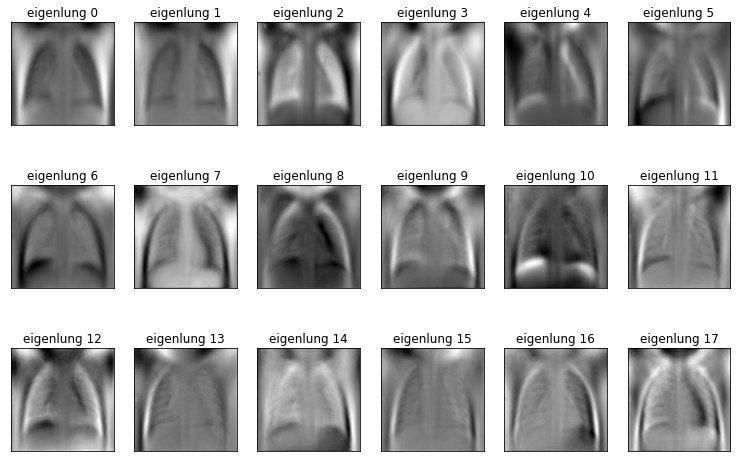

In [6]:
print ("Extracting the top %d eigenlungs from %d lungs" % (n_components, data.shape[0]))

rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(data.copy())

eigenlungs = rpca.components_.reshape((n_components, h, w))
eigenlung_titles = ["eigenlung %d" % i for i in range(eigenlungs.shape[0])]

plot_gallery(eigenlungs, eigenlung_titles, h, w)
plot_explained_variance(rpca)

Randomized PCA was identical to PCA concerning the Accuracy vs. # of Principal Components. Like above, it took 45 components to reach an 80% accuracy, 151 components for a 90% accuracy, and 334 components for a 95% accuracy.

### 3.3 PCA and Randomized PCA Comparison

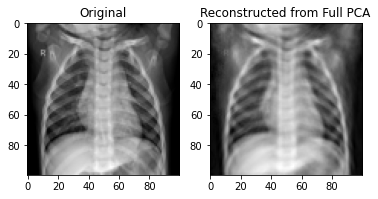

In [7]:
#a helper function from class
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

idx_to_reconstruct = 1    
data_idx = data[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,data_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(data_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid(False)

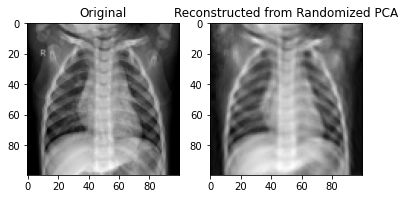

In [8]:
idx_to_reconstruct = 1    
data_idx = data[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(rpca,data_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(data_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Randomized PCA')
plt.grid(False)

The visible difference between the Full PCA and Randomized PCA is negligible. 

In [9]:
#make quantitative comparison here

TYPE ANALYSIS AND CONCLUSIONS HERE:mean square error will help find difference between them

### 3.4 Perform Feature Extraction

(3, 3, 68)
612


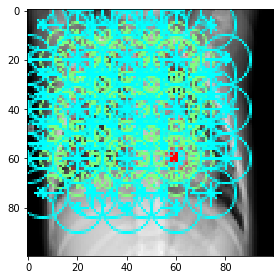

In [10]:
from skimage.feature import daisy
from skimage.io import imshow

idx_to_reconstruct = int(np.random.rand(1)*len(data))
img = data[idx_to_reconstruct].reshape(h,w)
# lets visualize what the daisy descriptor looks like
features, img_desc = daisy(img, 
                           step=20, 
                           radius=20, 
                           rings=2, 
                           histograms=8, 
                           orientations=8, 
                           visualize=True)
imshow(img_desc)
plt.grid(False)

features = daisy(img, step=20, radius=20, rings=2, histograms=8, orientations=4, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

In [11]:
# create a function to take in the row of the matrix and return a new feature (from class)
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=20, radius=20, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    return feat.reshape((-1))

# apply to single image
%time test_feature = apply_daisy(data[idx_to_reconstruct],(h,w))
test_feature.shape

CPU times: total: 0 ns
Wall time: 8.01 ms


(612,)

In [12]:
# apply to entire data, row by row
# takes about 10s to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, data, (h,w))
print(daisy_features.shape)

CPU times: total: 11.1 s
Wall time: 11.1 s
(1731, 612)


In [13]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: total: 375 ms
Wall time: 36 ms


### 3.5 Feature Extraction Analysis

Original Image: NORMAL2-IM-1131-0001.jpeg
Closest Image: NORMAL2-IM-0582-0001.jpeg


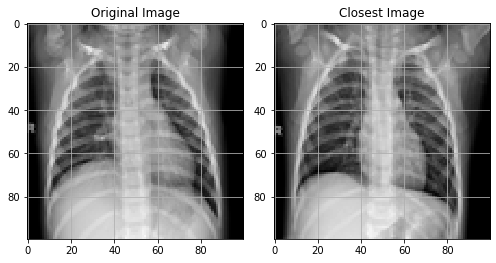

In [14]:
import copy
# find closest image to current image
distances = copy.deepcopy(dist_matrix[idx_to_reconstruct,:])
distances[idx_to_reconstruct] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(data[idx_to_reconstruct].reshape((h,w)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(data[idx2].reshape((h,w)))
plt.title("Closest Image")
plt.grid()

print("Original Image:",file_names[idx_to_reconstruct])
print("Closest Image:",file_names[idx2])

In [15]:
correct_predictions = 0
#loop through distances
for idx in range(len(distances)):
    distances = copy.deepcopy(dist_matrix[idx,:])
    distances[idx] = np.infty
    idx2 = np.argmin(distances)
    original = file_names[idx]
    closest = file_names[idx2]
    #check if closest image and original both match diagnosis
    if (original.find('person') != -1 and closest.find('person') != -1) or (original.find('person') == -1 and closest.find('person') == -1):
        correct_predictions += 1

print(correct_predictions,"correct predictions out of",len(distances),"comparisons")
print("Accuracy:",round((correct_predictions/len(distances)) * 100, 2))

1660 correct predictions out of 1731 comparisons
Accuracy: 95.9


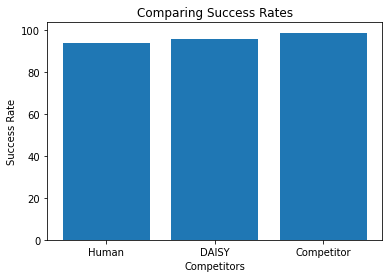

In [17]:
Competitors = ['Human','DAISY','Competitor']
SuccessRates = [94,95.9,98.81]

plt.bar(Competitors, SuccessRates)
plt.title('Comparing Success Rates')
plt.xlabel('Competitors')
plt.ylabel('Success Rate')
plt.show()

For our prediction task, the classifier using DAISY feature extraction had a success rate of 95.9% (1660/1731). The classifier's success rate placed almost equally between the general human radiologist success rate (94%) and the competiting classifier's success rate (98.81%). With a competitive success rate, this classifier could prove to be useful for radiologists to use in their practice.

## 4. Exceptional Work

In [19]:
def apply_daisy(row,shape): # no reshape in this function
    feat = daisy(row.reshape(shape), step=5, radius=5, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    s = feat.shape
    return feat.reshape((s[0]*s[1],s[2]))

daisy_features = np.apply_along_axis(apply_daisy, 1, data, (h,w))
daisy_features.shape

(1731, 324, 68)

In [22]:
from skimage.feature import daisy, match_descriptors

def find_match_percentages(min_ix, max_ix, daisy_features, h=100, w=100, figsize=(10,50), plot=True):
    
    ix_range = np.arange(min_ix, max_ix, 1)
    match_percentages = []; ix = []; ix_match = []
    for i in ix_range:
        match_percentages_i = []
        for j in range(len(daisy_features)):
            if j == i:
                continue
            matches_ij = match_descriptors(daisy_features[i], daisy_features[j], cross_check=True, max_ratio=0.8)
            match_percentages_ij = matches_ij.shape[0]/len(daisy_features[i])
            match_percentages_i.append(match_percentages_ij)
        match_percentages_i = np.array(match_percentages_i)
        ix_i = np.where(match_percentages_i == match_percentages_i.max())[0][0]
        match_percentages.append(match_percentages_i); ix.append(i); ix_match.append(ix_i)
    
    if plot == True:
        plt.figure(figsize=figsize)
        k = 0
        for m in range(len(ix_range)):
            plt.subplot(len(ix),2,1+k)
            plt.imshow(data[ix[m]].reshape(h,w), cmap=plt.cm.gray)
            plt.grid(False)

            plt.subplot(len(ix_range),2,2+k)
            plt.imshow(data[ix_match[m]].reshape(h,w), cmap=plt.cm.gray)
            plt.grid(False)
            k += 2
            
    return match_percentages, ix, ix_match

CPU times: total: 1min 38s
Wall time: 1min 38s


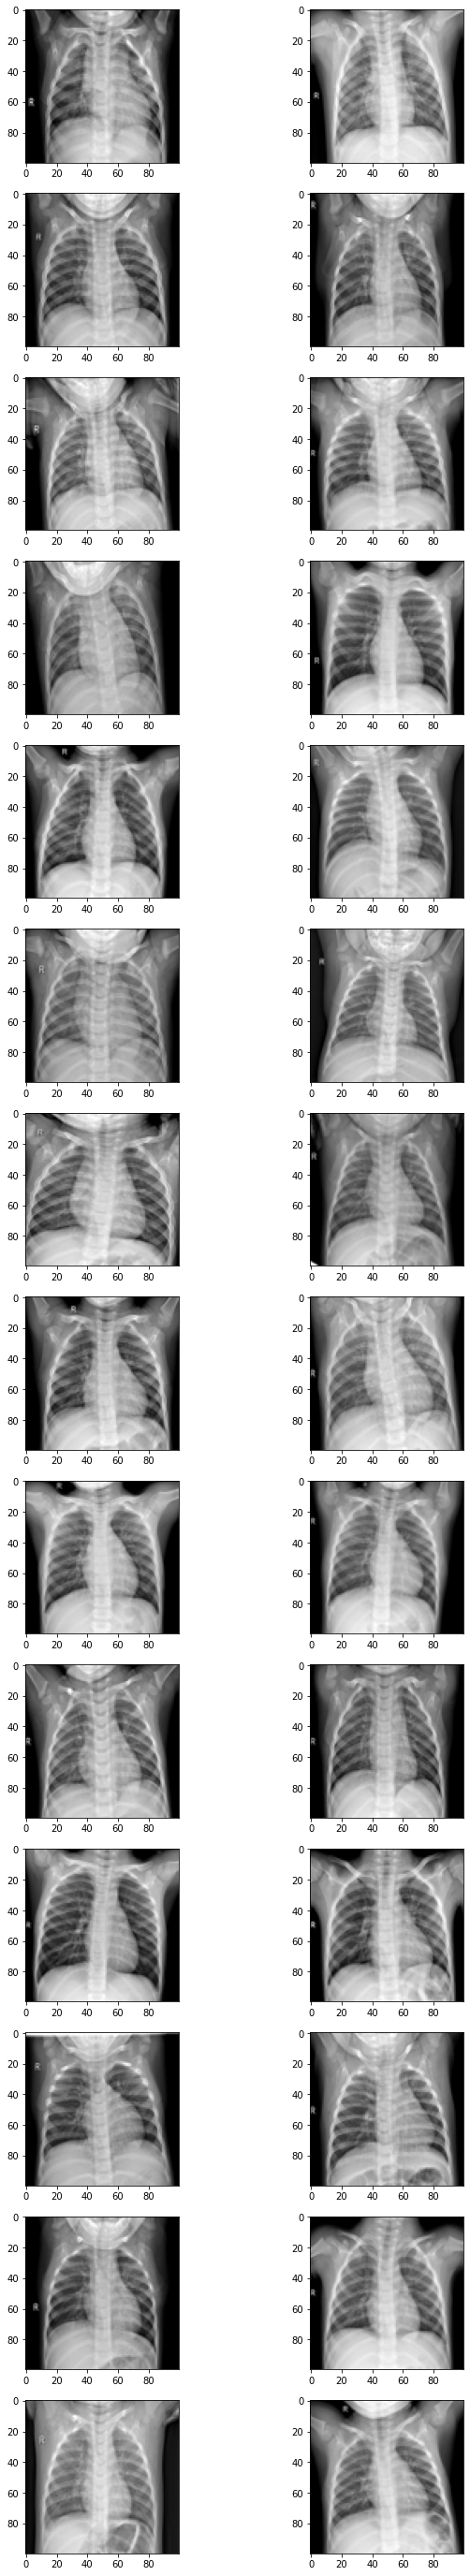

In [23]:
%%time
ix_min = 6; ix_max = 20
match_percentages, ix, ix_match = find_match_percentages(ix_min, ix_max, daisy_features)